In [2]:
import pandas as pd
import os

# Define the path to the MovieSummaries folder
base_path = '../MovieSummaries/'

# List the files
character_metadata_file = os.path.join(base_path, 'character.metadata.tsv')
movie_metadata_file = os.path.join(base_path, 'movie.metadata.tsv')
name_clusters_file = os.path.join(base_path, 'name.clusters.txt')
plot_summaries_file = os.path.join(base_path, 'plot_summaries.txt')
tvtropes_clusters_file = os.path.join(base_path, 'tvtropes.clusters.txt')

# Load the character metadata file
character_metadata = pd.read_csv(character_metadata_file, sep='\t', header=None)

# Load the movie metadata file
movie_metadata = pd.read_csv(movie_metadata_file, sep='\t', header=None)

# Load the name clusters file (if it's tab-separated)
name_clusters = pd.read_csv(name_clusters_file, sep='\t', header=None)

# Load the plot summaries file (assuming it’s in a specific format)
plot_summaries = pd.read_csv(plot_summaries_file, sep='\t', header=None)

# Load the TV Tropes clusters file
tvtropes_clusters = pd.read_csv(tvtropes_clusters_file, sep='\t', header=None)

# Display the first few rows of each file to inspect the data
print(character_metadata.head())
print(movie_metadata.head())
print(name_clusters.head())
print(plot_summaries.head())
print(tvtropes_clusters.head())


       0          1           2                           3           4  5   \
0  975900  /m/03vyhn  2001-08-24                    Akooshay  1958-08-26  F   
1  975900  /m/03vyhn  2001-08-24  Lieutenant Melanie Ballard  1974-08-15  F   
2  975900  /m/03vyhn  2001-08-24         Desolation Williams  1969-06-15  M   
3  975900  /m/03vyhn  2001-08-24          Sgt Jericho Butler  1967-09-12  M   
4  975900  /m/03vyhn  2001-08-24             Bashira Kincaid  1977-09-25  F   

      6           7                   8     9           10          11  \
0  1.620         NaN      Wanda De Jesus  42.0  /m/0bgchxw  /m/0bgcj3x   
1  1.780  /m/044038p  Natasha Henstridge  27.0   /m/0jys3m  /m/0bgchn4   
2  1.727     /m/0x67            Ice Cube  32.0   /m/0jys3g  /m/0bgchn_   
3  1.750         NaN       Jason Statham  33.0  /m/02vchl6  /m/0bgchnq   
4  1.650         NaN         Clea DuVall  23.0  /m/02vbb3r  /m/0bgchp9   

           12  
0  /m/03wcfv7  
1   /m/0346l4  
2  /m/01vw26l  
3   /m/034hyc  


              0                                                  1
38057    442668  The film is a parody of the historical spectac...
33028  28743583  A shy Argentine librarian Juan Dahlman  dreams...
1067    4032727  Elisabeth Shue plays the title character, Moll...
41149  26087436  Pundarikudu  is from a pious Brahmin family wh...
3588   32214275  The titular character is Isabel, a woman with ...
count    42303.000000
mean      1784.034229
std       1808.925536
min         99.000000
25%        508.000000
50%       1079.000000
75%       2604.500000
max      28159.000000
Name: summary_length, dtype: float64


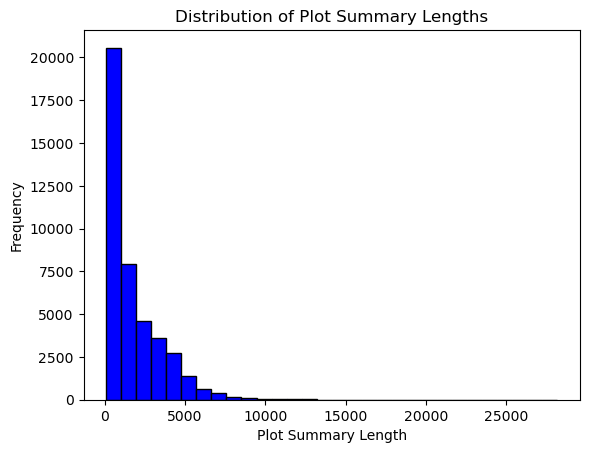

In [3]:
# Check a random sample of plot summaries
print(plot_summaries.sample(5))

# Calculate the length of each plot summary
plot_summaries['summary_length'] = plot_summaries[1].apply(len)

# Display summary statistics for the lengths
print(plot_summaries['summary_length'].describe())

# Plot the distribution of plot summary lengths
import matplotlib.pyplot as plt

plt.hist(plot_summaries['summary_length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Plot Summary Lengths')
plt.xlabel('Plot Summary Length')
plt.ylabel('Frequency')
plt.show()


In [4]:
# Merge character metadata with plot summaries
merged_data = pd.merge(character_metadata, plot_summaries, left_on=0, right_on=0)

# Display the merged dataset
print(merged_data.head())

        0        1_x           2                           3           4  5  \
0  975900  /m/03vyhn  2001-08-24                    Akooshay  1958-08-26  F   
1  975900  /m/03vyhn  2001-08-24  Lieutenant Melanie Ballard  1974-08-15  F   
2  975900  /m/03vyhn  2001-08-24         Desolation Williams  1969-06-15  M   
3  975900  /m/03vyhn  2001-08-24          Sgt Jericho Butler  1967-09-12  M   
4  975900  /m/03vyhn  2001-08-24             Bashira Kincaid  1977-09-25  F   

       6           7                   8     9          10          11  \
0  1.620         NaN      Wanda De Jesus  42.0  /m/0bgchxw  /m/0bgcj3x   
1  1.780  /m/044038p  Natasha Henstridge  27.0   /m/0jys3m  /m/0bgchn4   
2  1.727     /m/0x67            Ice Cube  32.0   /m/0jys3g  /m/0bgchn_   
3  1.750         NaN       Jason Statham  33.0  /m/02vchl6  /m/0bgchnq   
4  1.650         NaN         Clea DuVall  23.0  /m/02vbb3r  /m/0bgchp9   

           12                                                1_y  \
0  /m/03wcfv

In [8]:
# Ensure all plot summaries are strings and handle missing values by filling NaN with empty string
merged_data[1] = merged_data[1].fillna('').astype(str)

# Now combine all the plot summaries into a single string
all_summaries = ' '.join(merged_data[1])

# You can proceed to generate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_summaries)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


KeyError: 1